## Install libraries and models

In [ ]:
# install >= 3.0.1 spacy version
!pip install spacy==3.0.1

# install scispacy
!pip install scispacy

# install models
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_craft_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_jnlpba_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz

## Importing libraries

In [ ]:
# essentials
import pandas as pd
import numpy as np

# spacy
import scispacy
import spacy

# display results
from spacy import displacy

# scispacy models
import en_ner_craft_md
import en_ner_jnlpba_md
import en_ner_bc5cdr_md
import en_ner_bionlp13cg_md

# utility
from pprint import pprint

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

### Helper funcs

In [ ]:
def missing_cols(df):
    '''prints out columns with its amount of missing values with its %'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        pct = df[col].isna().mean() * 100
        total += missing_vals
        if missing_vals != 0:
          print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
    
    if total == 0:
        print("no missing values")

## Loading data

In [ ]:
data_path = 'PATH_TO_DATA'

# Load training datasets
abstracts_train = pd.read_csv(data_path + 'abstracts_train.csv', sep='\t')
entities_train = pd.read_csv(data_path + 'entities_train.csv', sep='\t')

# Load test data
abstracts_test = pd.read_csv(data_path + 'abstracts_test.csv', sep='\t')

In [ ]:
# print dimensions of data
print('Dimension of abstracts train: ', abstracts_train.shape)
print('Dimension of entities train: ', entities_train.shape)
print()
print('Dimension of abstracts test: ', abstracts_test.shape)

Dimension of abstracts train:  (400, 3)
Dimension of entities train:  (13636, 7)

Dimension of abstracts test:  (100, 3)


## EDA

In [ ]:
abstracts_train.info()
abstracts_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   abstract_id  400 non-null    int64 
 1   title        400 non-null    object
 2   abstract     400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


,abstract_id,title,abstract
0,1353340,Late-onset metachromatic leukodystrophy: molec...,We report on a new allele at the arylsulfatase...
1,1671881,Two distinct mutations at a single BamHI site ...,Classical phenylketonuria is an autosomal rece...
2,1848636,Debrisoquine phenotype and the pharmacokinetic...,The metabolism of the cardioselective beta-blo...
3,2422478,Midline B3 serotonin nerves in rat medulla are...,Previous experiments in this laboratory have s...
4,2491010,Molecular and phenotypic analysis of patients ...,Eighty unrelated individuals with Duchenne mus...


In [ ]:
entities_train.info()
entities_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             13636 non-null  int64 
 1   abstract_id    13636 non-null  int64 
 2   offset_start   13636 non-null  int64 
 3   offset_finish  13636 non-null  int64 
 4   type           13636 non-null  object
 5   mention        13636 non-null  object
 6   entity_ids     13636 non-null  object
dtypes: int64(4), object(3)
memory usage: 745.8+ KB


,id,abstract_id,offset_start,offset_finish,type,mention,entity_ids
0,0,1353340,11,39,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
1,1,1353340,111,126,GeneOrGeneProduct,arylsulfatase A,410
2,2,1353340,128,132,GeneOrGeneProduct,ARSA,410
3,3,1353340,159,187,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
4,4,1353340,189,192,DiseaseOrPhenotypicFeature,MLD,D007966


In [ ]:
missing_cols(abstracts_train)
missing_cols(entities_train)

no missing values
no missing values


### How many types are there?

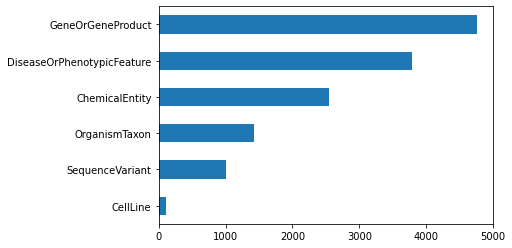

In [ ]:
entities_train['type'].value_counts().plot(kind="barh").invert_yaxis();

In [ ]:
abstracts_train.head()

,abstract_id,title,abstract
0,1353340,Late-onset metachromatic leukodystrophy: molec...,We report on a new allele at the arylsulfatase...
1,1671881,Two distinct mutations at a single BamHI site ...,Classical phenylketonuria is an autosomal rece...
2,1848636,Debrisoquine phenotype and the pharmacokinetic...,The metabolism of the cardioselective beta-blo...
3,2422478,Midline B3 serotonin nerves in rat medulla are...,Previous experiments in this laboratory have s...
4,2491010,Molecular and phenotypic analysis of patients ...,Eighty unrelated individuals with Duchenne mus...


## scispaCy in action

In [ ]:
text = abstracts_train.iloc[0].title + abstracts_train.iloc[0].abstract
len(text)

717

In [ ]:
text

'Late-onset metachromatic leukodystrophy: molecular pathology in two siblings.We report on a new allele at the arylsulfatase A (ARSA) locus causing late-onset metachromatic leukodystrophy (MLD). In that allele arginine84, a residue that is highly conserved in the arylsulfatase gene family, is replaced by glutamine. In contrast to alleles that cause early-onset MLD, the arginine84 to glutamine substitution is associated with some residual ARSA activity. A comparison of genotypes, ARSA activities, and clinical data on 4 individuals carrying the allele of 81 patients with MLD examined, further validates the concept that different degrees of residual ARSA activity are the basis of phenotypical variation in MLD.. '

In [ ]:
nlp = en_ner_bionlp13cg_md.load()
doc_bionlp13cg = nlp(text)

In [ ]:
doc_bionlp13cg.ents

(arylsulfatase A,
 ARSA),
 MLD,
 arginine84,
 arylsulfatase,
 glutamine,
 MLD,
 arginine84,
 glutamine,
 ARSA,
 ARSA,
 individuals,
 patients,
 MLD,
 ARSA,
 MLD)

In [ ]:
displacy.render(doc_bionlp13cg_md, jupyter=True, style='ent')

In [ ]:
pprint({(X.text, X.label_, X.start_char, X.end_char) for X in doc_bionlp13cg_md.ents})

{('ARSA', 'GENE_OR_GENE_PRODUCT', 441, 445),
 ('ARSA', 'GENE_OR_GENE_PRODUCT', 483, 487),
 ('ARSA', 'GENE_OR_GENE_PRODUCT', 654, 658),
 ('ARSA)', 'GENE_OR_GENE_PRODUCT', 127, 132),
 ('MLD', 'CANCER', 188, 191),
 ('MLD', 'GENE_OR_GENE_PRODUCT', 362, 365),
 ('MLD', 'GENE_OR_GENE_PRODUCT', 575, 578),
 ('MLD', 'GENE_OR_GENE_PRODUCT', 711, 714),
 ('arginine84', 'GENE_OR_GENE_PRODUCT', 209, 219),
 ('arginine84', 'GENE_OR_GENE_PRODUCT', 371, 381),
 ('arylsulfatase', 'GENE_OR_GENE_PRODUCT', 263, 276),
 ('arylsulfatase A', 'GENE_OR_GENE_PRODUCT', 110, 125),
 ('glutamine', 'AMINO_ACID', 305, 314),
 ('glutamine', 'AMINO_ACID', 385, 394),
 ('individuals', 'ORGANISM', 523, 534),
 ('patients', 'ORGANISM', 561, 569)}


### Use the three other models

In [ ]:
nlp_craft = en_ner_craft_md.load()
nlp_jnlpba = en_ner_jnlpba_md.load()
nlp_bc5cdr = en_ner_bc5cdr_md.load()

doc_craft = nlp_craft(text)
doc_jnlpba = nlp_jnlpba(text)
doc_bc5cdr= nlp_bc5cdr(text)

## Display the entities with other models

In [ ]:
displacy.render(doc_craft, jupyter=True, style="ent")


In [ ]:
displacy.render(doc_jnlpba, jupyter=True, style='ent')

In [ ]:
displacy.render(doc_bc5cdr, jupyter=True, style='ent')

Let's take the above entitiy categorizations and put them into data frame

In [ ]:
data_doc_bionlp13cg = [(X.text, X.label_, X.start_char, X.end_char) for X in doc_bionlp13cg.ents]
data_doc_jcraft = [(X.text, X.label_, X.start_char, X.end_char) for X in doc_jcraft.ents]
data_doc_bc5cdr = [(X.text, X.label_, X.start_char, X.end_char) for X in doc_bc5cdr.ents]
data_doc_jnlpba = [(X.text, X.label_, X.start_char, X.end_char) for X in doc_jnlpba.ents]

data = data_doc_bionlp13cg + data_doc_jcraft + data_doc_bc5cdr + data_doc_jnlpba

In [ ]:
len(data)

48

In [ ]:
attrs = ["text", "label_", "start_char", "end_char"]
temp_df = pd.DataFrame(data, columns=attrs)

In [ ]:
temp_train_df = entities_train.query('abstract_id == 1353340')
temp_train_df.head()

,id,abstract_id,offset_start,offset_finish,type,mention,entity_ids
0,0,1353340,11,39,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
1,1,1353340,111,126,GeneOrGeneProduct,arylsulfatase A,410
2,2,1353340,128,132,GeneOrGeneProduct,ARSA,410
3,3,1353340,159,187,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
4,4,1353340,189,192,DiseaseOrPhenotypicFeature,MLD,D007966


In [ ]:
merged_df = temp_df.merge(temp_train_df, how = 'inner', left_on ='text', right_on = 'mention')
merged_df[['text', 'label_', 'type']].drop_duplicates()

,text,label_,type
0,arylsulfatase A,GENE_OR_GENE_PRODUCT,GeneOrGeneProduct
1,arylsulfatase A,GGP,GeneOrGeneProduct
2,MLD,CANCER,DiseaseOrPhenotypicFeature
6,MLD,GENE_OR_GENE_PRODUCT,DiseaseOrPhenotypicFeature
18,MLD,DISEASE,DiseaseOrPhenotypicFeature
34,arginine84,GENE_OR_GENE_PRODUCT,SequenceVariant
36,arginine84,PROTEIN,SequenceVariant
37,arylsulfatase,GENE_OR_GENE_PRODUCT,GeneOrGeneProduct
38,ARSA,GENE_OR_GENE_PRODUCT,GeneOrGeneProduct
50,ARSA,GGP,GeneOrGeneProduct


In [ ]:
temp_df.label_.unique()

array(['GENE_OR_GENE_PRODUCT', 'CANCER', 'AMINO_ACID', 'ORGANISM',
       'CHEBI', 'SO', 'GGP', 'TAXON', 'DISEASE', 'CHEMICAL', 'DNA',
       'PROTEIN'], dtype=object)

In [ ]:
temp_train_df.type.unique()

array(['DiseaseOrPhenotypicFeature', 'GeneOrGeneProduct',
       'SequenceVariant', 'OrganismTaxon'], dtype=object)

In [ ]:
temp_df.label_ = temp_df.label_.map(
    {
        "GENE_OR_GENE_PRODUCT": "GeneOrGeneProduct",
        "GGP": "GeneOrGeneProduct",
        "ORGANISM": "OrganismTaxon",
        "CANCER": "DiseaseOrPhenotypicFeature",
        "DISEASE": "DiseaseOrPhenotypicFeature",
        "CHEBI": "ChemicalEntity",
        "CHEMICAL": "ChemicalEntity",
        "PROTEIN": "SequenceVariant",
        "AMINO_ACID": "SequenceVariant",
        "SO": "SO",
        "TAXON": "TAXON",
        "DNA": "DNA",
    }
)

In [ ]:
temp_df.head()

,text,label_,start_char,end_char
0,arylsulfatase A,GeneOrGeneProduct,110,125
1,ARSA),GeneOrGeneProduct,127,132
2,MLD,DiseaseOrPhenotypicFeature,188,191
3,arginine84,GeneOrGeneProduct,209,219
4,arylsulfatase,GeneOrGeneProduct,263,276


In [ ]:
temp_df['start_char'] = temp_df['start_char'] + 1

In [ ]:
temp_df.text = temp_df.text.str.replace(')', '')

In [ ]:
temp_df.head()

,text,label_,start_char,end_char
0,arylsulfatase A,GeneOrGeneProduct,111,125
1,ARSA,GeneOrGeneProduct,128,132
2,MLD,DiseaseOrPhenotypicFeature,189,191
3,arginine84,GeneOrGeneProduct,210,219
4,arylsulfatase,GeneOrGeneProduct,264,276


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a605a3e6-1564-47b2-94e7-842290ba7692' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>